# Red Wine Machine Learning Model

In [72]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

In [60]:
path = 'Resources/RedWine_dataset.csv'
red_wine_df = pd.read_csv(path)
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [61]:
# Check for null values
red_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
red_wine_df['quality'].value_counts().sort_values() 

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

### Split the Data into Training and Testing

In [63]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

In [64]:
model = LogisticRegression()

# Fit the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
# Training and testing accuracy
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.5804837364470392
Testing accuracy : 0.615


In [69]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.68      0.78      0.73       186
           6       0.54      0.66      0.59       147
           7       0.50      0.09      0.15        44
           8       0.00      0.00      0.00         5

    accuracy                           0.61       400
   macro avg       0.29      0.26      0.25       400
weighted avg       0.57      0.61      0.57       400



/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [70]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))
print(y.shape)

[[  0   0   2   1   0   0]
 [  0   0  11   4   0   0]
 [  0   0 145  40   1   0]
 [  0   0  47  97   3   0]
 [  0   0   7  33   4   0]
 [  0   0   0   5   0   0]]
(1599,)


### Correlation Heatmap

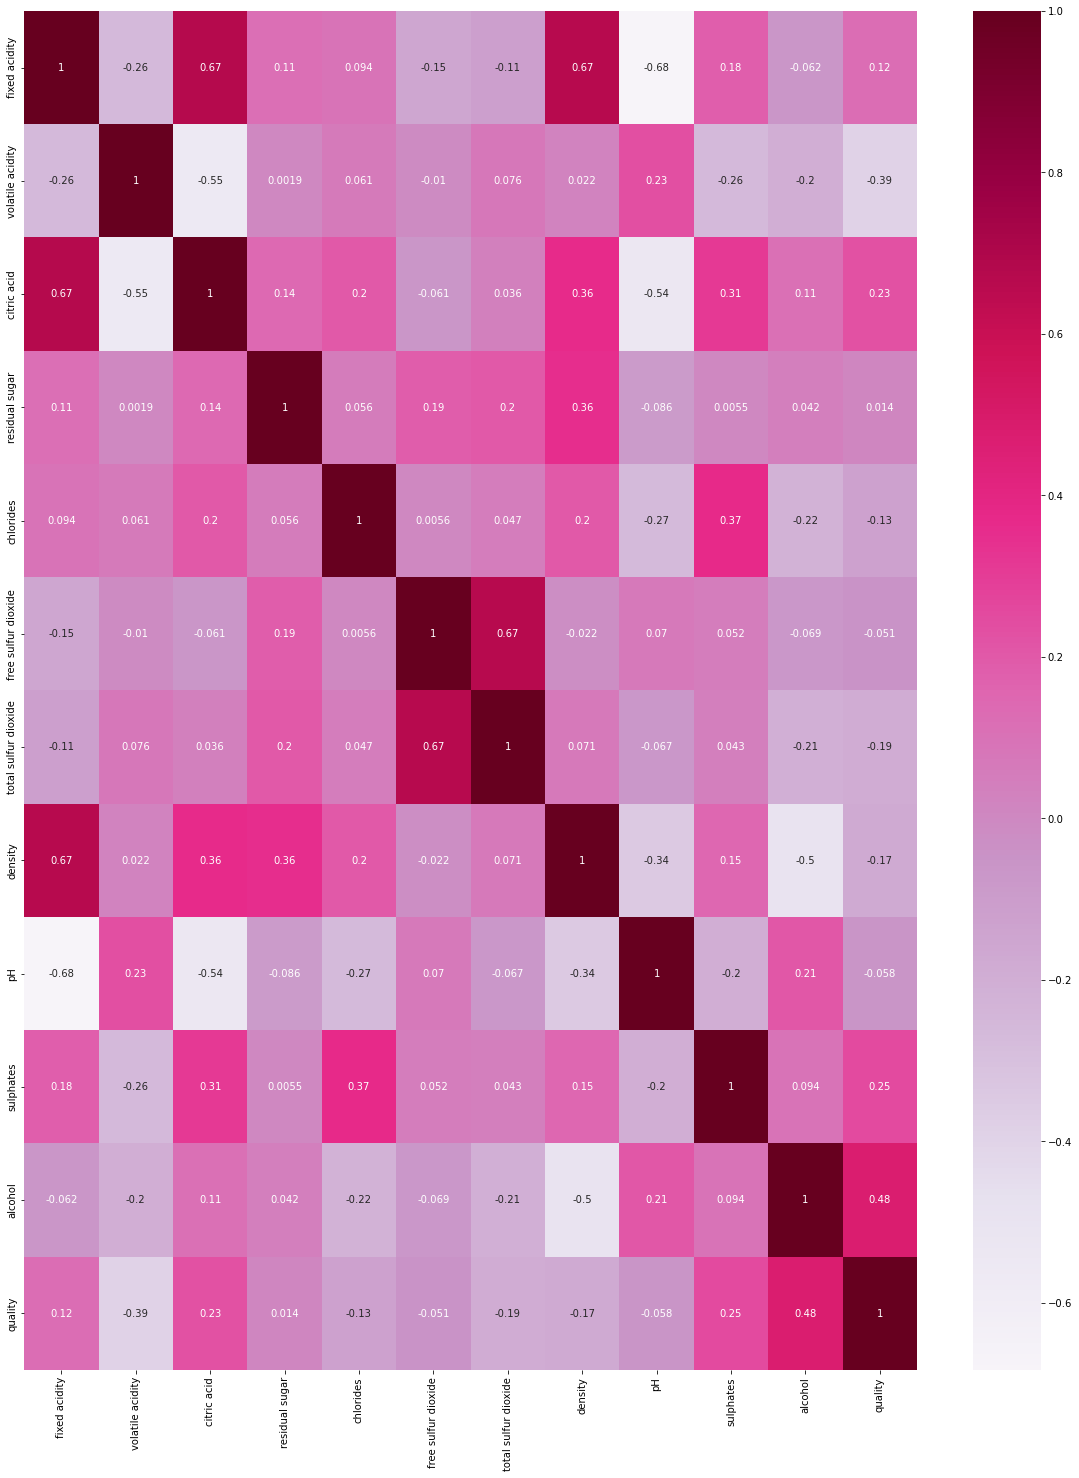

In [76]:
plt.figure(figsize=(20,25))
sns.heatmap(red_wine_df.corr(), annot=True,cmap='PuRd')
plt.show()